# Task 2: Data Analysis

First, I import all the libraries necessary for Task 2

In [57]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import http.client
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates 

I then read in all the json files made in task 1.I then set the Date column as the datetime type

In [58]:
#Reading json files in
dfApple = pd.read_json("AppleStocks.json",)
dfDisney = pd.read_json("DisneyStocks.json")
dfNin = pd.read_json("NintendoStocks.json")
dfPfizer = pd.read_json("PfizerStocks.json")
#Setting Date column in every dataframe as datetimetype
dfApple['Date']=pd.to_datetime(dfApple['Date'],format='%y-%m-%d %I:%M%p')
dfDisney['Date']=pd.to_datetime(dfDisney['Date'],format='%y-%m-%d %I:%M%p')
dfNin['Date']=pd.to_datetime(dfNin['Date'],format='%y-%m-%d %I:%M%p')
dfPfizer['Date']=pd.to_datetime(dfPfizer['Date'],format='%y-%m-%d %I:%M%p')

I want to drop the Year, Month and Day columns as I already have a date column that has all
three so i use the drop() function to drop the columns at index 1, 2 and 3 and I set inital 
column as Date. I repeat this for every DataFrame.

In [59]:
dfApple.drop(dfApple.columns[[1, 2, 3]], axis = 1, inplace = True)
dfApple=dfApple.set_index("Date")
dfApple

,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,AAPL,56.267502,57.055000,56.049999,56.147499
2019-10-02,AAPL,55.764999,55.895000,54.482498,54.740002
2019-10-03,AAPL,54.607498,55.240002,53.782501,55.205002
2019-10-04,AAPL,56.410000,56.872501,55.972500,56.752499
2019-10-07,AAPL,56.567501,57.482498,56.459999,56.764999
...,...,...,...,...,...
2021-09-24,AAPL,145.660004,147.470001,145.559998,146.919998
2021-09-27,AAPL,145.470001,145.960007,143.820007,145.369995
2021-09-28,AAPL,143.250000,144.750000,141.690002,141.910004


In [60]:
dfDisney.drop(dfDisney.columns[[1, 2, 3]], axis = 1, inplace = True)
dfDisney=dfDisney.set_index("Date")
dfDisney

,Stock,Open,High,Low,Close
Date,,,,,
2019-01-10,DIS,130.800003,131.779999,129.509995,129.550003
2019-02-10,DIS,128.509995,129.220001,127.570000,129.139999
2019-03-10,DIS,128.600006,129.429993,127.540001,128.149994
2019-04-10,DIS,128.690002,130.440002,128.610001,130.270004
2019-07-10,DIS,129.294998,130.239997,128.489998,129.800003
...,...,...,...,...,...
2021-09-24,DIS,175.300003,176.699997,175.080002,176.000000
2021-09-27,DIS,176.630005,179.449997,175.960007,178.259995
2021-09-28,DIS,177.750000,178.000000,173.860001,174.520004


In [61]:
dfNin.drop(dfNin.columns[[1, 2, 3]], axis = 1, inplace = True)
dfNin=dfNin.set_index("Date")
dfNin

,Stock,Open,High,Low,Close
Date,,,,,
2019-01-10,NTDOY,47.330002,47.340000,46.619999,46.770000
2019-02-10,NTDOY,47.509998,47.639999,46.799999,47.049999
2019-03-10,NTDOY,47.049999,47.450001,46.980000,47.430000
2019-04-10,NTDOY,47.740002,48.029999,47.610001,48.029999
2019-07-10,NTDOY,47.080002,47.389999,47.080002,47.209999
...,...,...,...,...,...
2021-09-24,NTDOY,61.320000,61.320000,60.279999,60.759998
2021-09-27,NTDOY,61.250000,61.290001,60.419998,60.740002
2021-09-28,NTDOY,60.380001,60.380001,58.049999,58.169998


In [62]:
dfPfizer.drop(dfPfizer.columns[[1, 2, 3]], axis = 1, inplace = True)
dfPfizer=dfPfizer.set_index("Date")
dfPfizer

,Stock,Open,High,Low,Close
Date,,,,,
2019-01-10,PFE,33.453510,33.462997,32.884251,32.922199
2019-02-10,PFE,33.453510,33.462997,32.884251,32.922199
2019-03-10,PFE,32.931690,33.652752,32.827324,33.633778
2019-04-10,PFE,33.671726,34.136623,33.633778,34.089184
2019-07-10,PFE,33.984821,34.402279,33.965843,33.994308
...,...,...,...,...,...
2021-09-24,PFE,44.070000,44.410000,43.810001,43.939999
2021-09-27,PFE,43.919998,44.130001,43.509998,43.570000
2021-09-28,PFE,43.070000,43.279999,42.430000,43.040001


The question asked to have a Time Series at daily,monthly, and  quarterly frequencies. So i used the groupby() function to create a dataframe for monthly and quarterly
I start by doing this for Apple DataFrame. I started with the Apple stock prices and grouped them into monthly frequencies and got the mean of each month.

In [28]:
df_month_Apple=dfApple["Close"].groupby(pd.Grouper(freq='M')).mean()

Date
2019-10-31     58.819456
2019-11-30     65.643126
2019-12-31     69.151725
2020-01-31     77.976608
2020-02-29     77.767696
2020-03-31     65.611023
2020-04-30     67.935595
2020-05-31     77.553813
2020-06-30     86.570965
2020-07-31     95.566250
2020-08-31    117.187649
2020-09-30    115.125237
2020-10-31    116.616591
2020-11-30    116.911249
2020-12-31    127.372500
2021-01-31    133.036842
2021-02-28    131.696315
2021-03-31    122.165434
2021-04-30    131.696668
2021-05-31    126.784000
2021-06-30    129.890909
2021-07-31    145.090714
2021-08-31    148.218863
2021-09-30    148.209523
Freq: M, Name: Close, dtype: float64

I then carried on with the Apple stock prices and grouped them into quarterly frequencies using groupby() and calculating the mean every quarter

In [29]:
df_quart_Apple=dfApple["Close"].groupby(pd.Grouper(freq='Q')).mean()

Date
2019-12-31     64.342129
2020-03-31     73.524798
2020-06-30     77.496587
2020-09-30    109.078564
2020-12-31    120.406016
2021-03-31    128.520246
2021-06-30    129.506508
2021-09-30    147.189375
Freq: Q-DEC, Name: Close, dtype: float64

Monthly for Disney:

In [30]:
df_month_Disney=dfDisney["Close"].groupby(pd.Grouper(freq='M')).mean()

Date
2019-01-31    131.150002
2019-02-28    139.879997
2019-03-31    138.364998
2019-04-30    137.156667
2019-05-31    139.444999
2019-06-30    139.465004
2019-07-31    131.380005
2019-08-31    133.762505
2019-09-30    137.770004
2019-10-31    131.468748
2019-11-30    146.422664
2019-12-31    145.602857
2020-01-31    134.303094
2020-02-29    129.411499
2020-03-31    108.669092
2020-04-30    112.693182
2020-05-31    117.924737
2020-06-30    117.475238
2020-07-31    120.734457
2020-08-31    128.956665
2020-09-30    127.218864
2020-10-31    128.220434
2020-11-30    138.833685
2020-12-31    155.886000
2021-01-31    174.894998
2021-02-28    185.882666
2021-03-31    186.743684
2021-04-30    183.556749
2021-05-31    176.944444
2021-06-30    176.809999
2021-07-31    179.222000
2021-08-31    180.186501
2021-09-30    179.772856
2021-10-31    184.458336
2021-11-30    183.981666
2021-12-31    184.147145
Freq: M, Name: Close, dtype: float64

Quarterly for Disney:

In [31]:
df_quart_Disney=dfDisney["Close"].groupby(pd.Grouper(freq='Q')).mean()

Date
2019-03-31    136.464999
2019-06-30    138.470001
2019-09-30    134.304171
2019-12-31    140.850665
2020-03-31    123.798650
2020-06-30    115.916129
2020-09-30    125.512083
2020-12-31    140.397258
2021-03-31    182.393845
2021-06-30    179.262767
2021-09-30    179.727869
2021-12-31    184.193159
Freq: Q-DEC, Name: Close, dtype: float64

Monthly for Nintendo:

In [32]:
df_month_Nintendo=dfNin["Close"].groupby(pd.Grouper(freq='M')).mean()

Date
2019-01-31    48.190000
2019-02-28    48.545000
2019-03-31    49.180000
2019-04-30    49.386667
2019-05-31    49.670000
2019-06-30    49.369999
2019-07-31    47.685000
2019-08-31    47.325001
2019-09-30    49.720001
2019-10-31    45.114375
2019-11-30    48.555333
2019-12-31    50.343215
2020-01-31    52.413809
2020-02-29    50.603000
2020-03-31    48.518636
2020-04-30    55.078637
2020-05-31    53.457369
2020-06-30    56.337620
2020-07-31    56.305652
2020-08-31    62.286667
2020-09-30    65.943636
2020-10-31    63.783043
2020-11-30    62.567894
2020-12-31    70.611000
2021-01-31    75.446111
2021-02-28    76.504999
2021-03-31    71.656843
2021-04-30    72.731750
2021-05-31    73.144722
2021-06-30    72.530000
2021-07-31    69.985250
2021-08-31    64.264250
2021-09-30    63.490476
2021-10-31    68.671667
2021-11-30    72.296667
2021-12-31    72.039999
Freq: M, Name: Close, dtype: float64

Quarterly for Nintendo:

In [33]:
df_quart_Nintendo=dfNin["Close"].groupby(pd.Grouper(freq='Q')).mean()

Date
2019-03-31    48.638333
2019-06-30    49.462857
2019-09-30    48.243334
2019-12-31    47.888111
2020-03-31    50.478730
2020-06-30    55.008226
2020-09-30    61.421363
2020-12-31    65.613226
2021-03-31    74.367019
2021-06-30    72.799643
2021-09-30    65.873606
2021-12-31    71.057368
Freq: Q-DEC, Name: Close, dtype: float64

Monthly for Pfizer:

In [48]:
df_month_Pfizer=dfPfizer["Close"].groupby(pd.Grouper(freq='M')).mean()

Date
2019-01-31    34.672674
2019-02-28    34.622865
2019-03-31    34.867175
2019-04-30    35.452245
2019-05-31    35.820683
2019-06-30    36.005693
2019-07-31    34.506641
2019-08-31    34.383301
2019-09-30    35.109108
2019-10-31    35.086278
2019-11-30    35.661606
2019-12-31    36.883641
2020-01-31    36.410868
2020-02-29    34.097400
2020-03-31    31.761034
2020-04-30    35.250921
2020-05-31    35.557026
2020-06-30    32.769269
2020-07-31    35.420654
2020-08-31    35.955012
2020-09-30    34.800108
2020-10-31    35.311378
2020-11-30    36.013644
2020-12-31    36.320061
2021-01-31    37.170139
2021-02-28    36.383000
2021-03-31    37.145000
2021-04-30    38.444000
2021-05-31    39.069444
2021-06-30    39.286944
2021-07-31    40.817500
2021-08-31    44.733999
2021-09-30    42.560476
2021-10-31    40.665000
2021-11-30    38.824167
2021-12-31    38.642857
Freq: M, Name: Close, dtype: float64

Quarterly for Pfizer:

In [49]:
df_quart_Pfizer=dfPfizer["Close"].groupby(pd.Grouper(freq='Q')).mean()

Date
2019-03-31    34.720904
2019-06-30    35.715641
2019-09-30    34.666350
2019-12-31    35.837234
2020-03-31    34.052682
2020-06-30    34.504168
2020-09-30    35.383829
2020-12-31    35.851970
2021-03-31    36.933894
2021-06-30    38.915982
2021-09-30    42.701639
2021-12-31    39.338684
Freq: Q-DEC, Name: Close, dtype: float64

# Apple Analysis

I then use the plot() function to visualize how the Close price of the stocks in Apple changed over time at daily frequencies

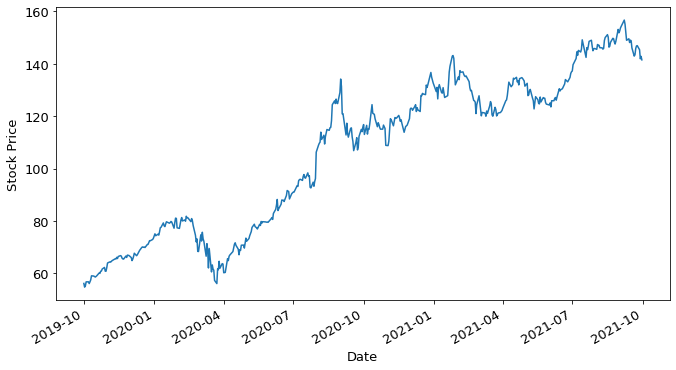

In [36]:
p = dfApple["Close"].plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Stock Price",fontsize=13);

Analysing the graph, we can see a large dip in stock price in the March-April period in 2020.
We can of course tell that this was due to the start of the Covid 19 pandemic, as people were
not spending much money in these times. We then see a large spike as things began to get back 
to normal. We also see a rise in the price of stocks from around September 2020 to now, with
the release of the new iPhone 12

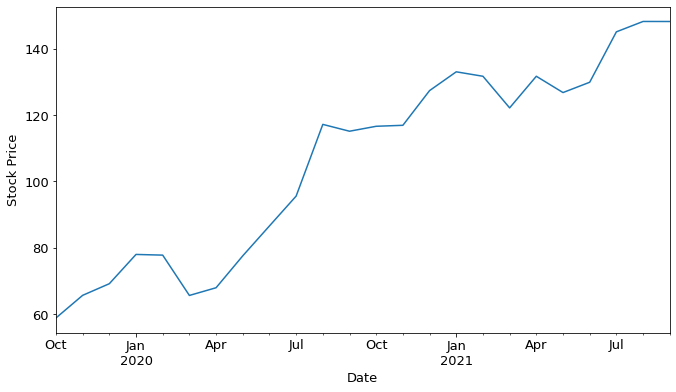

In [37]:
p = df_month_Apple.plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Stock Price",fontsize=13);

Using the monthly frequency time series, although not as accurate, can give us a larger understanding into how big some of the dips and how significant some of the spikes were.As
we see,the spike from April to July appears a lot smoother and clearer in this plot and indciates how well Apple did coming out of the lockdown in March 2020.

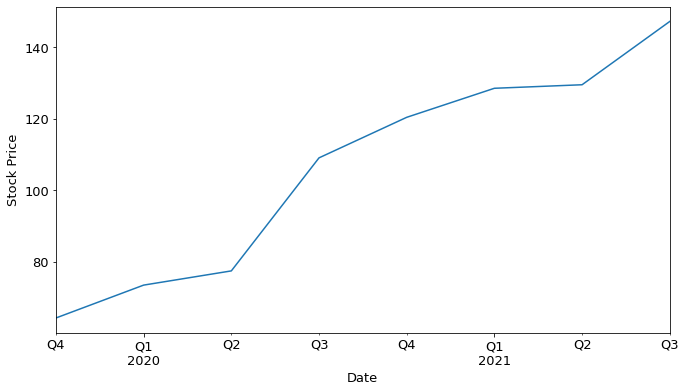

In [38]:
p = df_quart_Apple.plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Stock Price",fontsize=13);

Looking at the quarterly frequency time series, we can see that Apple have performed very well in the last three years and are continuing to grow and larger and stock prices are on the up for Apple.

# Disney analysis 

Using the plot() function, we create the daily,monthly and quarterly time series for Disney stock prices

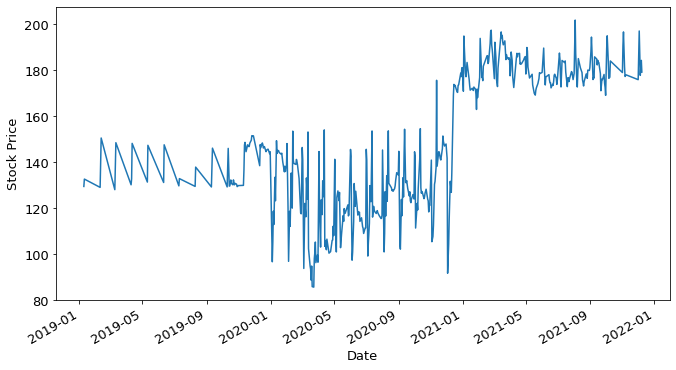

In [39]:
pdisney = dfDisney["Close"].plot(figsize=(11, 6), fontsize=13)
pdisney.set_xlabel("Date",fontsize=13)
pdisney.set_ylabel("Stock Price",fontsize=13);

Look at this daily frequency time series, we can't make much analysis from it.There seems to be dips and spikes.We do see an exceptional spike around January 2021 which was probably due to recovery from the pandemic more adding revenue to their own cruises,their theme parks and their film business.

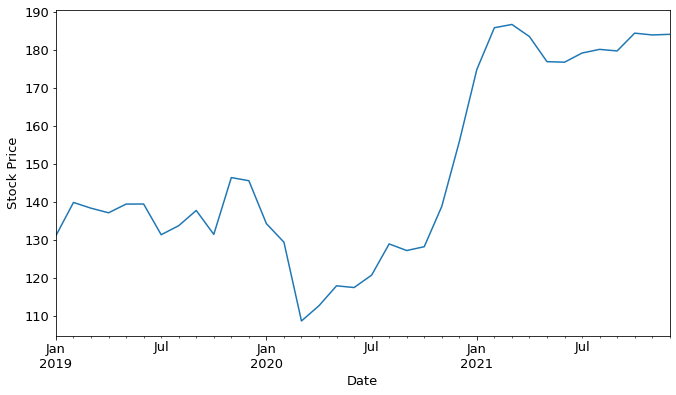

In [63]:
pdisney = df_month_Disney.plot(figsize=(11, 6), fontsize=13)
pdisney.set_xlabel("Date",fontsize=13)
pdisney.set_ylabel("Stock Price",fontsize=13);

This monthly times series gives us a better idea of Disney's stock prices. Obviously we see the large dip in March 2020 because of the pandemic but we then see a huge spike which i talked about earlier being due to easing of restrictions. 

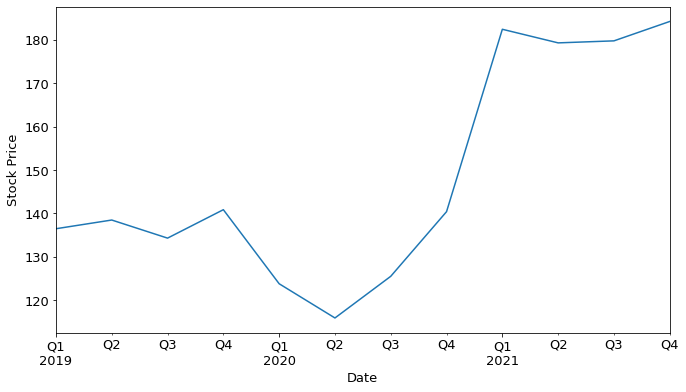

In [41]:
pdisney = df_quart_Disney.plot(figsize=(11, 6), fontsize=13)
pdisney.set_xlabel("Date",fontsize=13)
pdisney.set_ylabel("Stock Price",fontsize=13);

The quarterly Disney time series indicates that they have actually done quite well in the last three years and are looking like they are still on a gradual up in terms of stock prices

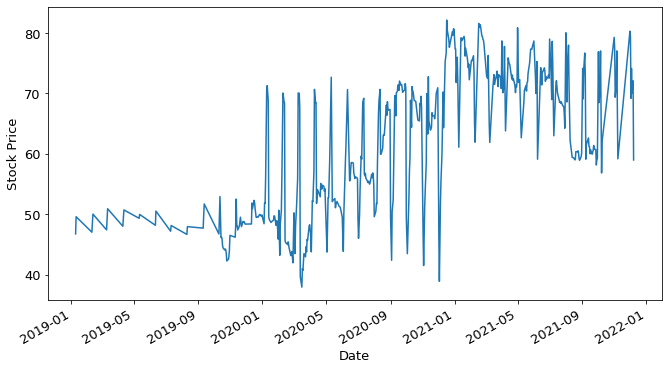

In [50]:
pNintendo = dfNin["Close"].plot(figsize=(11, 6), fontsize=13)
pNintendo.set_xlabel("Date",fontsize=13)
pNintendo.set_ylabel("Stock Price",fontsize=13);

The daily Nintendo time series is very hard to read with spikes and dips everywhere in the graph. This is why we use the other frequencies to give us a better visual representation of Nintendos stock prices over time.

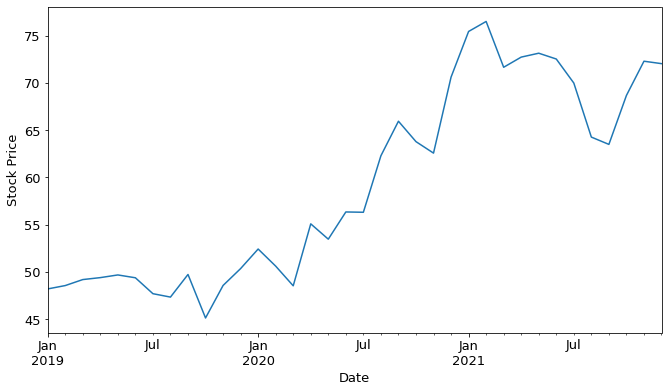

In [51]:
pNintendo = df_month_Nintendo.plot(figsize=(11, 6), fontsize=13)
pNintendo.set_xlabel("Date",fontsize=13)
pNintendo.set_ylabel("Stock Price",fontsize=13);

In the monthly time series, we can better visualise what went on with Nintendos stock price.In January 2021,there was a large spike.
this was due to an introduction of popular revamped games across all
Nintendo console platforms,one of those games being Spiderman which was a big hit

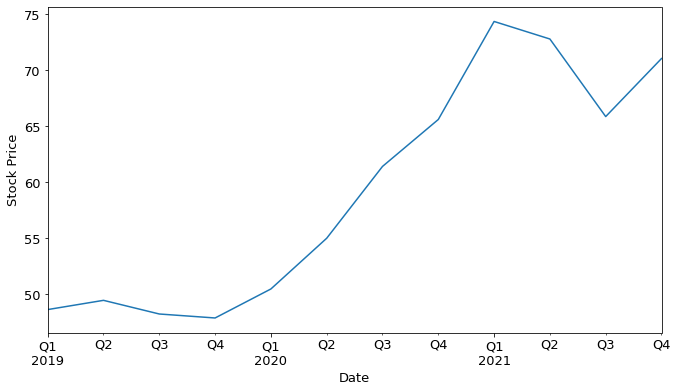

In [52]:
pNintendo = df_quart_Nintendo.plot(figsize=(11, 6), fontsize=13)
pNintendo.set_xlabel("Date",fontsize=13)
pNintendo.set_ylabel("Stock Price",fontsize=13);

The quarterly times series makes it obvious that there was a big drop
in stock price in late 2021.This was most likely due to one of the company's investors culling most of their stake in the company 

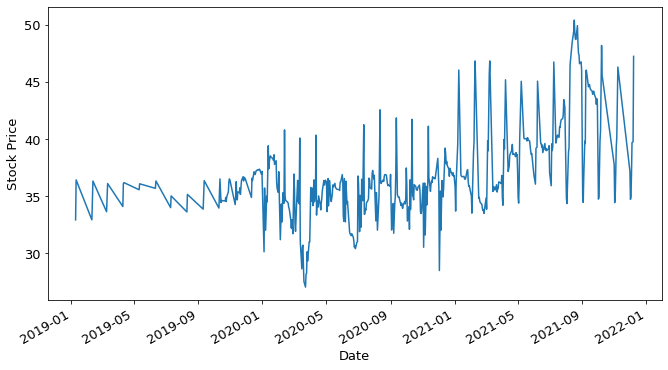

In [54]:
pPfizer = dfPfizer["Close"].plot(figsize=(11, 6), fontsize=13)
pPfizer.set_xlabel("Date",fontsize=13)
pPfizer.set_ylabel("Stock Price",fontsize=13);

Not much to comment about the initial daily graph.Seems to be the largest spike middle of 2021. The stock price seemd to be going steady until the start of 2020, and seemed to go all over the place after that point.

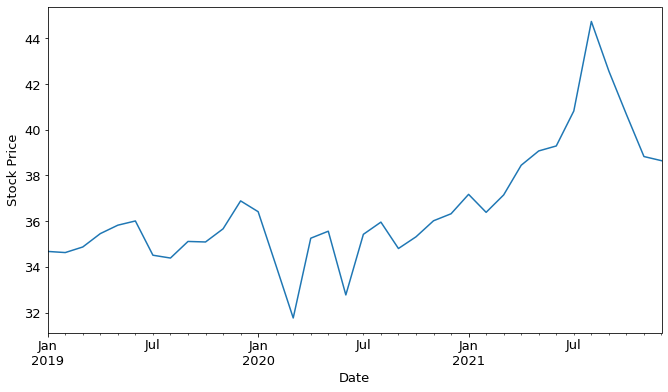

In [55]:
pPfizer = df_month_Pfizer.plot(figsize=(11, 6), fontsize=13)
pPfizer.set_xlabel("Date",fontsize=13)
pPfizer.set_ylabel("Stock Price",fontsize=13);

Now we can see a huge spike near August 2021 which would have been from all the Pfizer vaccinations against Covid 19 rolling out. We then saw a large decline in stock prices because of the vast majority of the population had received their vaccination.

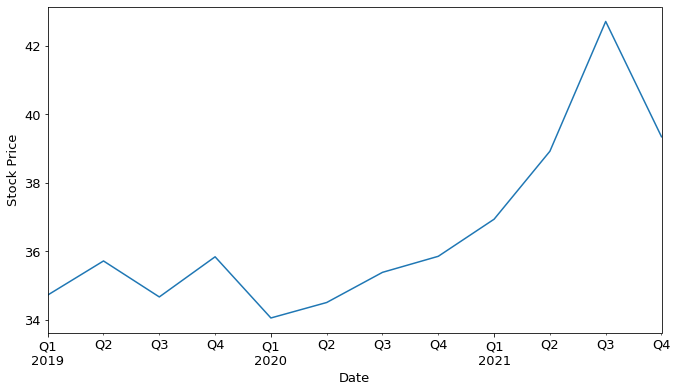

In [56]:
pPfizer = df_quart_Pfizer.plot(figsize=(11, 6), fontsize=13)
pPfizer.set_xlabel("Date",fontsize=13)
pPfizer.set_ylabel("Stock Price",fontsize=13);

From the quarterly time series, we can take that Pfizer really benefitted from the Covid 19 pandemic with the rolling out of vaccinations as stock prices from 2019 were much lower than what they are now